In [49]:
import numpy as np
import time
import matplotlib.pyplot as plt

from math import gcd, sqrt
from scipy.special import comb
from tqdm import trange

%matplotlib inline

First step is to check if $n = a^{b}$. We do it as a brute force search by power $(b)$ and binary search by base $(a)$. Time complexity is $\mathcal{O}^{\sim}(log^{3}n)$.

In [50]:
def checkpower(i, n):
    left = 2
    right = n
    flag = False

    while left <= right and not flag:
        mid = int((left + right) / 2)
        temp = mid ** i
        if temp == n:
            flag = True
        else:
            if n < temp:
                right = int((left + right) / 2) - 1
            else:
                left = int((left + right) / 2) + 1

    return flag

In [51]:
def checkperfectpower(n):
    for i in np.arange(2, np.log2(n) + 1):
        if checkpower(i, n):
            return True
    return False

Second step. Time complexity is $\mathcal{O}^{\sim}(log^{7}n)$.

In [52]:
def getord(r, n, threshold):
    if gcd(r, n) > 1:
        return False
    for i in np.arange(1, threshold):
        if (n ** int(i)) % r == 1:
            return False
    return True

In [53]:
def smallestr(n):    
    rmax = max(3, int(np.ceil(np.log2(n) ** 5)))
    threshold = np.log2(n) ** 2
    for r in np.arange(2, rmax + 1):
        if getord(r, n, threshold):
            return r

Third step. Time complexity is $\mathcal{O}(log^{6}n)$.

In [54]:
def elimination(r, n):
    for a in np.arange(2, r + 1):
        if 1 < gcd(n, a) < n:
            return True
    return False

Forth step. Time complexity is $\mathcal{O}(log\ n)$.

Fifth step. Time complexity is $\mathcal{O}(log^{\frac{21}{2}}n)$.

In [73]:
def euler(n):
    amount = 0
    for k in range(1, n + 1):
        if gcd(n, k) == 1:
            amount += 1
    return amount

In [74]:
def polynomial_coef(n, a):
    ex = []
    for i in range(n + 1):
        ex.append(comb(n, n - i, exact=True) * (a ** (n - i)))
    return ex[::-1]

In [75]:
def reduce(polynomial, r):
    for i in range(len(polynomial) - r):
        k = polynomial[i]
        polynomial[i] = 0
        polynomial[i + r] -= k
    return polynomial

In [80]:
def modul(n, r):
    for a in np.arange(1, np.floor(sqrt(euler(n)) * np.log2(n)) + 1):
        coef = polynomial_coef(n, int(a))
        coef[0] -= 1
        coef[-1] -= int(a)
        divided = reduce(coef, int(r))
        if not all(x%n == 0 for x in divided):
            return False
    return True

To sum up:

In [81]:
def AKS(n):
    if checkperfectpower(n):
        return False
    else:
        r = smallestr(n)
        if elimination(r, n):
            return False
        else:
            if n <= r:
                return True
            else:
                if modul(n, r):
                    return True
                else:
                    return False

In [78]:
def is_prime(a):
    return all(a % i for i in range(2, a))

Correctness

100%|██████████| 1000/1000 [27:19<00:00,  1.64s/it]


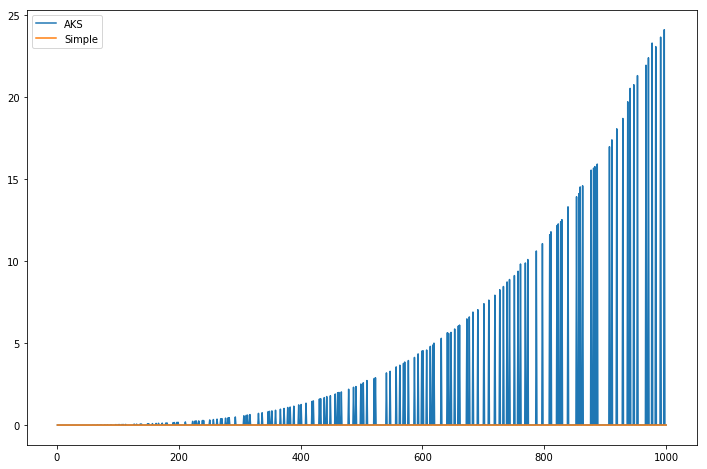

In [85]:
slow = []
fast = []

for i in trange(1, 1001):
    start = time.time()
    aks = AKS(i)
    end = time.time()
    slow.append(end - start)
    
    start = time.time()
    prime = is_prime(i)
    end = time.time()
    fast.append(end - start)
    if AKS(i) != is_prime(i):
        print(i)
        break
    
plt.figure(figsize=(12,8))
plt.plot(np.arange(1, 1001), slow, label='AKS')
plt.plot(np.arange(1, 1001), fast, label='Simple')
plt.legend()
plt.show()

In [61]:
%%time
AKS(10000000000000000001)

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 5.34 ms


/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:8: RuntimeWarning: overflow encountered in double_scalars


False

In [62]:
%%time
is_prime(10000000000000000001)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 13.4 µs


False

In [352]:
%%time
AKS(98764321261)

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:8: RuntimeWarning: overflow encountered in double_scalars


KeyboardInterrupt: 

In [86]:
%%time
AKS(12347)

KeyboardInterrupt: 

In [63]:
%%time
AKS(23456789101112)

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:8: RuntimeWarning: overflow encountered in double_scalars


CPU times: user 32.8 s, sys: 112 ms, total: 32.9 s
Wall time: 33 s


False

In [84]:
AKS(41)

True